In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

##**Задание**


---
##**Task**

Реализуйте базовую модель логистической регрессии для классификации текстовых  
сообщений (используемые данные [здесь](https://github.com/DurinPavel/classification_text_messages/blob/main/spam.csv)) по признаку спама. Для этого:
1. Приведите весь текст к нижнему регистру;  
2. Удалите мусорные символы;  
3. Удалите стоп-слова;  
4. Приведите все слова к нормальной форме;  
5. Преобразуйте все сообщения в вектора TF-IDF; 
6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split; 
7. Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных; 
8. Опишите результаты при помощи confusion_matrix; 
9. Постройте датафрейм, который будет содержать все исходные тексты сообщений,  
классифицированные неправильно (с указанием фактического и предсказанного).


---
Implement a basic logistic regression model for text
message classification (data used [here](https://github.com/DurinPavel/classification_text_messages/blob/main/spam.csv)) based on spam. For this:
1. Reduce the entire text to lowercase;  
2. Remove junk symbols;  
3. Delete stop words;  
4. Bring all the words to normal form;  
5. Convert all messages to TF-IDF vectors;
6. Divide the data into test and training data in a ratio of 30/70, specify  
random_state=42. Use train_test_split;  
7. Build a logistic regression model, specify random_state=42, estimate  
its accuracy is based on test data;
8. Describe the results using confusion_matrix;
9. Build a dataframe that will contain all the original texts of messages
classified incorrectly (indicating the actual and predicted).

In [ ]:
# Загрузим наши данные, для удобства переименуем столбцы:
# -----------------------------------------------------------------------------
# Upload our data, rename the columns for convenience:

df = pd.read_csv('spam.csv',
                 header=0,
                 names=['Категория', 'Сообщение'])
df.head()

,Категория,Сообщение
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Приведем все слова к нижнему регистру:
# -----------------------------------------------------------------------------
# Reduce all words to lowercase:

texts_lower_case = [text.lower() for text in df['Сообщение']]
print(texts_lower_case)

In [ ]:
# Уберем все служебные символы и цифры:
# -----------------------------------------------------------------------------
# Remove all service symbols and numbers:

only_words_text = [re.sub('[\W_\d]+', ' ', text) for text in texts_lower_case]
print(only_words_text)

In [ ]:
# Токенизируем - разделим на отдельные слова:
# -----------------------------------------------------------------------------
# Tokenize - divide into separate words:

texts_splitted = [text.split() for text in only_words_text]
print(texts_splitted)

In [ ]:
# Удалим стоп-слова и слова из одной буквы:
# -----------------------------------------------------------------------------
# Remove stop words and words from the same letter:

nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
without_sw = [[word for word in text if len(word) > 1 \
               and word not in stopwords_set] for text in texts_splitted]
print(without_sw)

In [ ]:
# Лемманизируем - приведем все слова к нормальной форме:
# -----------------------------------------------------------------------------
# # Lemmatize - let 's bring all the words to normal form:

nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] \
                   for text in without_sw]
print(lemmatized_text)

In [ ]:
# Вернем все к простому списку:
# -----------------------------------------------------------------------------
# Let's return everything to a simple list:

text_list = [' '.join(text) for text in lemmatized_text]
print(text_list)

In [ ]:
# Преобразуем сообщения в вектора TF-IDF:
# -----------------------------------------------------------------------------
# Convert messages to TF-IDF vectors:

tfidf = TfidfVectorizer(use_idf=True)
tfidf_matrix = tfidf.fit_transform(text_list)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [ ]:
# Разделим наши данные на тестовые и тренировочные:
# -----------------------------------------------------------------------------
# Let's divide our data into test and training:

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix,
                                                    df['Категория'].values,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [ ]:
# Построим модель логистической регрессии:
# -----------------------------------------------------------------------------
# Let's build a logistic regression model:

lr = LogisticRegression(random_state=42)

In [ ]:
# Обучим нашу модель:
# -----------------------------------------------------------------------------
# Let's train our model:

lr.fit(X_train, y_train)

In [ ]:
# Сделаем предсказания:
# -----------------------------------------------------------------------------
# Make predictions:

lr.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [ ]:
# Оценим точность модели:
# -----------------------------------------------------------------------------
# Let's evaluate the accuracy of the model:

accuracy_score(y_test, lr.predict(X_test)).round(2)

0.96

*Видим, что модель работает достаточно хорошо.  
Точность предсказаний 96 %.*


---
*We see that the model works quite well.  
The accuracy of predictions is 96%.*

In [ ]:
# Построим матрицу ошибок:
# -----------------------------------------------------------------------------
# Let's build a matrix of errors:

c_matrix = confusion_matrix(y_test, lr.predict(X_test))
print(c_matrix)

[[1445    3]
 [  64  160]]


*Из данной матрицы мы видим, что 1445 - это число верно предсказанных  
сообщений, которые не являются спамом; 160 - число верно предсказанных  
сообщений, которые являются спамом; 3 - число ошибочно предсказанных  
сообщений, которые не являются спамом; 64 - число ошибочно предсказанных  
сообщений, которые являются спамом.*  


---
*From this matrix, we see that 1445 is the number of correctly predicted  
messages that are not spam; 160 is the number of correctly predicted  
messages that are spam; 3 is the number of erroneously predicted  
messages that are not spam; 64 is the number of erroneously predicted  
messages that are spam.*

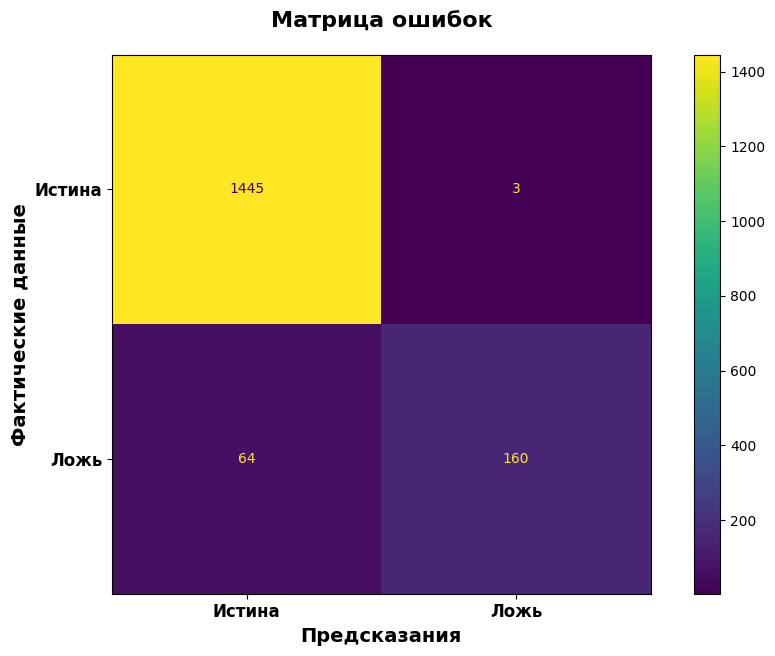

In [ ]:
# Визуализируем нашу матрицу:
# -----------------------------------------------------------------------------
# Visualize our matrix:

cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix,
                                    display_labels = ['Истина', 'Ложь'])

cm_display.plot()
plt.title('Матрица ошибок', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Предсказания', fontsize=14, fontweight='bold')
plt.ylabel('Фактические данные', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

In [ ]:
# Посмотрим разницу факта и прогноза:
# -----------------------------------------------------------------------------
# Let's see the difference between the fact and the forecast:

result = pd.DataFrame([y_test, lr.predict(X_test)]).T
result.columns = ['Факт', 'Прогноз']
result = result.loc[result['Факт'] != result['Прогноз']]
result.head()

,Факт,Прогноз
17,ham,spam
40,spam,ham
47,spam,ham
74,spam,ham
84,spam,ham


In [ ]:
# Построим датафрейм, который будет содержать все исходные тексты сообщений,
# классифицированные неправильно:
# -----------------------------------------------------------------------------
# Let's build a dataframe that will contain all the source texts of messages,
# classified incorrectly:

mispredicted = pd.merge(result, df['Сообщение'],
                        left_index=True, right_index=True)
mispredicted.head()

,Факт,Прогноз,Сообщение
17,ham,spam,Eh u remember how 2 spell his name... Yes i di...
40,spam,ham,Pls go ahead with watts. I just wanted to be s...
47,spam,ham,"Fair enough, anything going on?"
74,spam,ham,U can call me now...
84,spam,ham,Yup next stop.
